In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn import preprocessing
from sklearn import decomposition
import matplotlib.animation as animation
from sklearn.cluster import KMeans
from scipy.spatial import distance
from sklearn.metrics import silhouette_score
import seaborn as sns
from scipy.stats import kruskal

## Reading data from CSV 

In [2]:
## the Calm Tinkerers
type2_learners = [6.0,16.0,17.0,19.0,27.0,28.0,29.0, 37.0,39.0,41.0,45.0,46.0]


In [42]:
## Reading data
behavioral_data = pd.read_csv('path/to/dataset.csv')
behavioral_data=behavioral_data.drop('Unnamed: 0',axis=1)
behavioral_data=behavioral_data.dropna()
behavioral_data=behavioral_data[behavioral_data['team'].isin(type2_learners)]
behavioral_data

,team,time_in_secs,window,T_add,T_remove,T_ratio_add_del,T_action,T_hist,T_help,T1_T1_rem,...,at_partner,at_robot,other,T_speech,T_silence,T_overlap,T_short_pauses,T_long_pauses,T_overlap_over_speech,normalized_time
0,6.0,10.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.333333,38.666667,0.000000,1.951952,99.099099,0.000000,0.000000,0.000000,0.000000,0.007576
1,6.0,20.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,16.500000,15.500000,1.000000,0.750751,98.498498,0.000000,0.000000,0.000000,0.000000,0.015152
2,6.0,30.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.500000,35.166667,9.666667,1.951952,99.099099,0.000000,0.000000,0.000000,0.000000,0.022727
3,6.0,40.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.333333,32.500000,11.666667,10.360360,79.279279,0.000000,0.000000,0.000000,0.000000,0.030303
4,6.0,50.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8.333333,0.000000,0.000000,20.120120,91.591592,8.408408,0.000000,0.000000,41.791045,0.037879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4554,46.0,1510.0,151.0,2.0,0.0,10.0,5.0,1.0,0.0,0.0,...,15.333333,0.500000,0.000000,49.399399,44.444444,37.537538,4.255319,0.000000,75.987842,0.974194
4555,46.0,1520.0,152.0,0.0,1.0,0.0,5.0,2.0,0.0,0.0,...,19.833333,0.000000,0.000000,19.069069,83.483483,12.312312,8.661417,0.000000,64.566929,0.980645
4556,46.0,1530.0,153.0,2.0,0.0,10.0,2.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,62.312312,31.531532,52.252252,8.192771,0.000000,83.855422,0.987097
4557,46.0,1540.0,154.0,2.0,0.0,10.0,4.0,1.0,0.0,0.0,...,1.666667,0.000000,0.000000,63.063063,35.735736,50.150150,5.952381,0.000000,79.523810,0.993548


In [43]:
## Separating the metadata
meta_data=behavioral_data.loc[:,'team':'window']
team_id = behavioral_data.loc[:,'team']

In [44]:
## Separating features and their columns' names
features = behavioral_data.loc[:,'T_add':'normalized_time']
columns= features.columns

## Standarizing data

In [45]:
## Normalizing behavioral features with a MinMax Scaler
def standarize(df):
    standardiser = preprocessing.MinMaxScaler()
    data = standardiser.fit_transform(df)
    df =pd.DataFrame(data,columns= df.columns)
    return df

In [46]:
## Standarized data
std_features=standarize(features)
std_features

,T_add,T_remove,T_ratio_add_del,T_action,T_hist,T_help,T1_T1_rem,T1_T1_add,T1_T2_rem,T1_T2_add,...,at_partner,at_robot,other,T_speech,T_silence,T_overlap,T_short_pauses,T_long_pauses,T_overlap_over_speech,normalized_time
0,0.00,0.000,0.0,0.00,0.000,0.0,0.0,0.0,0.0,0.0,...,0.038043,0.720497,0.000000,0.014085,0.990506,0.000000,0.000000,0.000000,0.000000,0.002352
1,0.00,0.000,0.0,0.00,0.000,0.0,0.0,0.0,0.0,0.0,...,0.269022,0.288820,0.029126,0.000000,0.984177,0.000000,0.000000,0.000000,0.000000,0.009968
2,0.00,0.000,0.0,0.00,0.000,0.0,0.0,0.0,0.0,0.0,...,0.073370,0.655280,0.281553,0.014085,0.990506,0.000000,0.000000,0.000000,0.000000,0.017584
3,0.00,0.000,0.0,0.00,0.000,0.0,0.0,0.0,0.0,0.0,...,0.103261,0.605590,0.339806,0.112676,0.781646,0.000000,0.000000,0.000000,0.000000,0.025199
4,0.00,0.000,0.0,0.00,0.000,0.0,0.0,0.0,0.0,0.0,...,0.135870,0.000000,0.000000,0.227113,0.911392,0.105263,0.000000,0.000000,0.432769,0.032815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1591,0.50,0.000,1.0,0.20,0.125,0.0,0.0,0.0,0.0,0.0,...,0.250000,0.009317,0.000000,0.570423,0.414557,0.469925,0.042553,0.000000,0.786896,0.974058
1592,0.00,0.125,0.0,0.20,0.250,0.0,0.0,0.0,0.0,0.0,...,0.323370,0.000000,0.000000,0.214789,0.825949,0.154135,0.086614,0.000000,0.668626,0.980543
1593,0.50,0.000,1.0,0.08,0.000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.721831,0.278481,0.654135,0.081928,0.000000,0.868369,0.987029
1594,0.50,0.000,1.0,0.16,0.125,0.0,0.0,0.0,0.0,0.0,...,0.027174,0.000000,0.000000,0.730634,0.322785,0.627820,0.059524,0.000000,0.823513,0.993514


## PCA

In [47]:
## Principle Component Analsis
def PCA(df,n_components=columns.shape[0]):
    pca = decomposition.PCA(n_components=n_components)
    data=pca.fit_transform(df)
    df=pd.DataFrame(data)
    return df,pca.explained_variance_ratio_

In [48]:
PCAfeatures,varRatio= PCA(std_features)

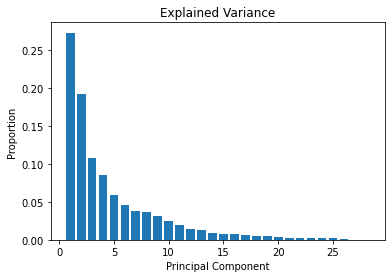

In [49]:
fig,ax = plt.subplots()
x = np.arange(1,varRatio.shape[0]+1,step=1)
ax.bar(x,varRatio)
plt.xlabel('Principal Component')
plt.ylabel('Proportion')
plt.title('Explained Variance')
plt.show()

Based on the elbow method on the proportion of explained vartiance, we identify the number of principle components as 4.

In [50]:
features_afterPCA,var = PCA(std_features, n_components=4)
features_afterPCA

,0,1,2,3
0,-0.437196,1.040631,-0.356145,-0.084555
1,-0.458152,1.049760,-0.052177,0.109060
2,-0.485918,1.070929,-0.075688,0.179596
3,-0.458249,0.934663,-0.032652,0.212846
4,-0.403187,0.645954,-0.160376,0.175187
...,...,...,...,...
1591,0.844147,-0.291209,0.220244,-0.303624
1592,-0.312401,0.161043,0.368234,-0.490500
1593,0.838880,-0.503976,0.375713,-0.016617
1594,0.851525,-0.481875,0.279320,-0.144454


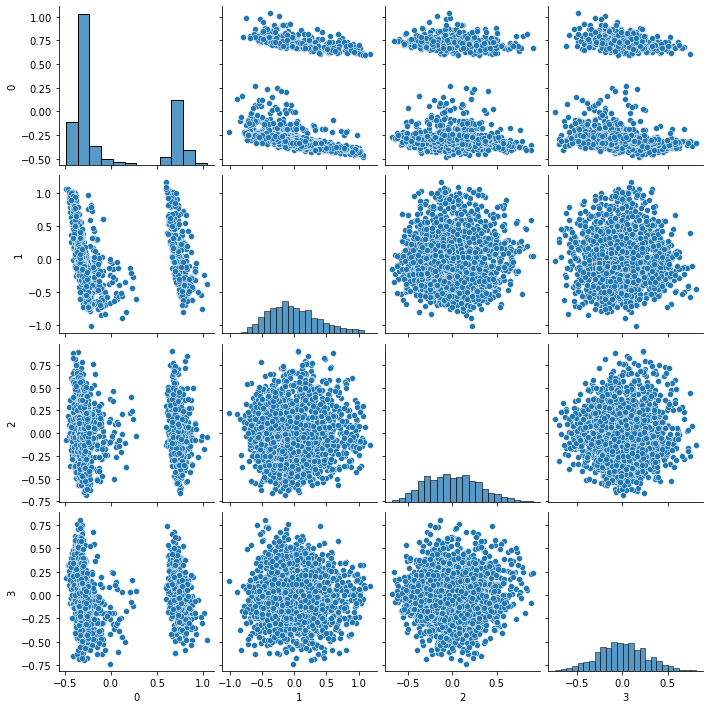

In [51]:
## Pair plot of the PCs
sns.pairplot(features_afterPCA)

## K-Means Clustering

In [52]:
# K-means clustering with k from [1,10]
# compute inertia and silhouette_scores to choose optimal k
sse = []
distortions=[]
s_score=[]
list_k = np.arange(1,10)
for k in list_k:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(features_afterPCA)
    labels = kmeans.labels_
    sse.append(kmeans.inertia_)
    if(k!=1):
        s_score.append(silhouette_score(features_afterPCA,labels))


    

[Text(0.5, 1.0, 'Silhouette score to number of clusters for the CT')]

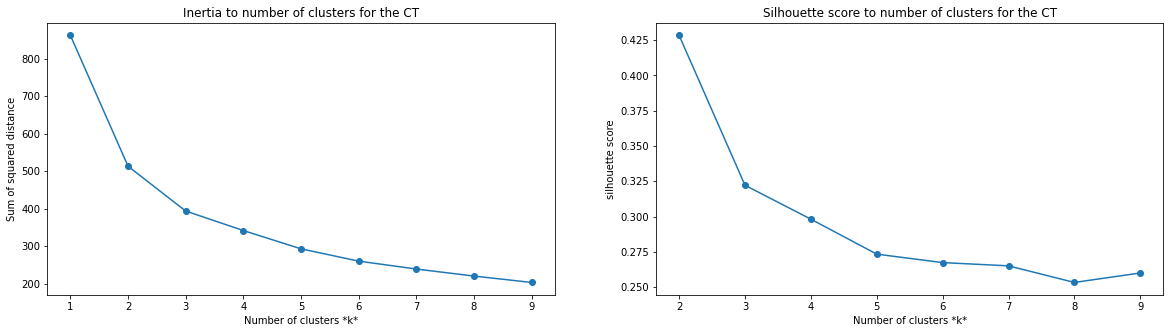

In [53]:
fig, ax = plt.subplots(1, 2,figsize=(20,5))

ax[0].plot(list_k, sse, '-o')
ax[0].set_xlabel(r'Number of clusters *k*')
ax[0].set_ylabel('Sum of squared distance')
ax[0].set(title= 'Inertia to number of clusters for the CT')
ax[1].plot(np.arange(2,10), s_score, '-o')
ax[1].set_xlabel(r'Number of clusters *k*')
ax[1].set_ylabel('silhouette score')
ax[1].set(title ='Silhouette score to number of clusters for the CT')

We can conclude that there are 3 clusters

### Cluster Analysis

In [55]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(features_afterPCA)
labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

In [56]:
cluster_centers

array([[-0.26134126, -0.2777319 ,  0.00310729, -0.00451382],
       [-0.35063479,  0.38362011, -0.01278655, -0.02022409],
       [ 0.73358332,  0.06627694,  0.00727084,  0.02603399]])

In [57]:
## features and their labels
clustered_features=pd.DataFrame(std_features)
clustered_features = clustered_features.assign(label=pd.Series(labels).values)
clustered_features = clustered_features.assign(team=pd.Series(team_id).values)

In [58]:
## size per cluster
clusters= clustered_features.groupby('label')
size_per_cluster =clusters.size()

In [59]:
## conditional means
mk = clusters.mean()
mk

,T_add,T_remove,T_ratio_add_del,T_action,T_hist,T_help,T1_T1_rem,T1_T1_add,T1_T2_rem,T1_T2_add,...,at_robot,other,T_speech,T_silence,T_overlap,T_short_pauses,T_long_pauses,T_overlap_over_speech,normalized_time,team
label,,,,,,,,,,,,,,,,,,,,,
0,0.048867,0.039483,0.018484,0.038244,0.013987,0.012276,0.100567,0.001416,0.055241,0.010623,...,0.022289,0.072224,0.643895,0.401719,0.502540,0.053562,0.008047,0.738473,0.569104,30.454674
1,0.011574,0.021123,0.004630,0.020185,0.010706,0.023920,0.023148,0.004630,0.018519,0.000000,...,0.048022,0.072456,0.340384,0.696115,0.169277,0.069554,0.021267,0.417302,0.370899,29.011574
2,0.317686,0.000000,1.000000,0.060961,0.010371,0.005095,0.000000,0.004367,0.000000,0.012009,...,0.009846,0.063637,0.532647,0.494168,0.375767,0.057917,0.015076,0.608819,0.519249,28.844978


In [60]:
## Data points in Cluster 0
clusterArray=[]
cluster0 = clusters.get_group(0).drop('label',axis='columns')
clusterArray.append(cluster0)


In [61]:
## Data points in Cluster 1
cluster1 = clusters.get_group(1).drop('label',axis='columns')
clusterArray.append(cluster1)

In [62]:
## Data points in Cluster 2
cluster2= clusters.get_group(2).drop('label',axis='columns')
clusterArray.append(cluster2)

In [63]:
# Kruskal Wallis test on clusters
clus01=[]
clus02=[]
clus12=[]
for feature in columns:
    clus01.append((feature,kruskal(clusterArray[0][feature],clusterArray[1][feature]).pvalue))
    clus02.append((feature,kruskal(clusterArray[0][feature],clusterArray[2][feature]).pvalue))
    clus12.append((feature,kruskal(clusterArray[1][feature],clusterArray[2][feature]).pvalue))


In [64]:
clus01.sort(key= lambda elem : elem[1] )
clus02.sort(key= lambda elem : elem[1] )
clus12.sort(key= lambda elem : elem[1] )

In [65]:
## sorted by ascendant p-value/// features with pvalue > threshold are marked with xx
threshold=0.01
print (' ---- for cluster 0 and cluster 1 :')
for pair in clus01:
    ind=''
    if(pair[1]>threshold):
        ind=' xx '
    print(' ------'+ind+' feature:'+str(pair[0])+'  || pvalue : '+str(pair[1]))
    
print ('\n ---- for cluster 0 and cluster 2 :')
for pair in clus02:
    ind=''
    if(pair[1]>threshold):
        ind=' xx '
    print(' ------'+ind+' feature:'+str(pair[0])+'  || pvalue : '+str(pair[1]))
print ('\n ---- for cluster 1 and cluster 2 :')
for pair in clus12:
    ind=''
    if(pair[1]>threshold):
        ind=' xx '
    print(' ------'+ind+' feature:'+str(pair[0])+'  || pvalue : '+str(pair[1]))


 ---- for cluster 0 and cluster 1 :
 ------ feature:T_overlap  || pvalue : 1.932420140003173e-159
 ------ feature:T_speech  || pvalue : 2.630355473321298e-143
 ------ feature:T_overlap_over_speech  || pvalue : 2.3635454431379566e-127
 ------ feature:T_silence  || pvalue : 5.5558852849327575e-124
 ------ feature:normalized_time  || pvalue : 5.910484589402795e-28
 ------ feature:T_add  || pvalue : 1.13847293868883e-07
 ------ feature:T_ratio_add_del  || pvalue : 1.3170955334099064e-07
 ------ feature:T_remove  || pvalue : 5.886604365530419e-07
 ------ feature:T1_T1_rem  || pvalue : 8.347162704384556e-07
 ------ feature:T_action  || pvalue : 1.2031123630667066e-06
 ------ feature:T_short_pauses  || pvalue : 6.206391415092696e-06
 ------ feature:positive  || pvalue : 0.0017344933764647454
 ------ feature:arousal  || pvalue : 0.0021942957213393678
 ------ feature:screen_left  || pvalue : 0.002212377702088181
 ------ feature:T1_T2_rem  || pvalue : 0.0025285720043125718
 ------ feature:T1_T2_

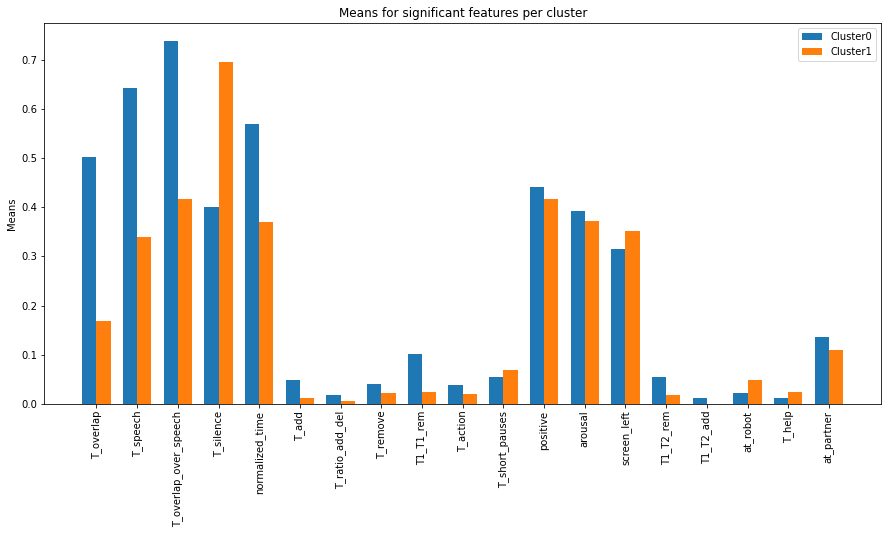

In [66]:
significant_feature01 =list(map(lambda c: c[0],list(filter(lambda pt: pt[1]<threshold,clus01))))
mean0=list()
mean1=list()
for ft in significant_feature01:
    mean0.append(mk[ft][0])
    mean1.append(mk[ft][1])
x = np.arange(len(significant_feature01))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(15,7))
rects1 = ax.bar(x - width/2, mean0, width, label='Cluster0')
rects2 = ax.bar(x + width/2, mean1, width, label='Cluster1')

ax.set_ylabel('Means')
ax.set_title('Means for significant features per cluster')
ax.set_xticks(x)
ax.set_xticklabels(significant_feature01)
plt.xticks(rotation=90)
ax.legend()


plt.show()


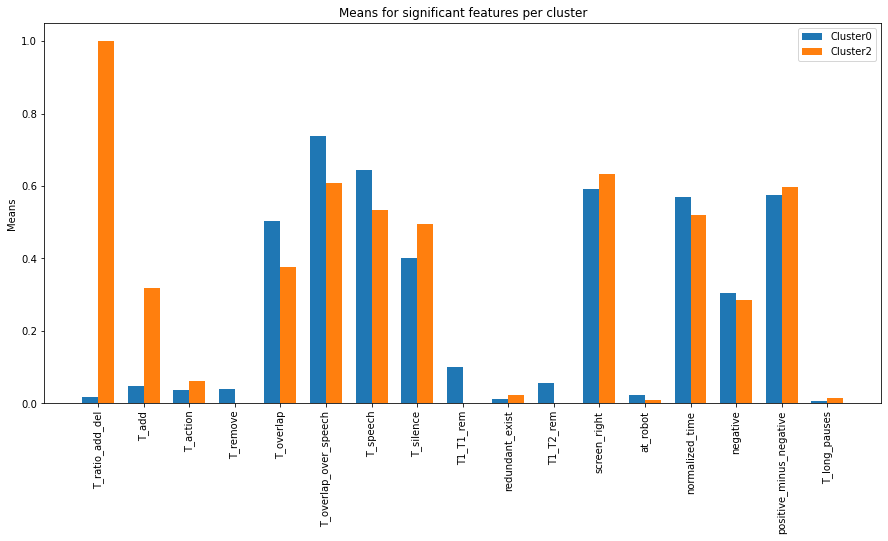

In [67]:
significant_feature02 =list(map(lambda c: c[0],list(filter(lambda pt: pt[1]<threshold,clus02))))
mean0=list()
mean2=list()
for ft in significant_feature02:
    mean0.append(mk[ft][0])
    mean2.append(mk[ft][2])
x = np.arange(len(significant_feature02))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(15,7))
rects1 = ax.bar(x - width/2, mean0, width, label='Cluster0')
rects2 = ax.bar(x + width/2, mean2, width, label='Cluster2')

ax.set_ylabel('Means')
ax.set_title('Means for significant features per cluster')
ax.set_xticks(x)
ax.set_xticklabels(significant_feature02)
plt.xticks(rotation=90)
ax.legend()


plt.show()

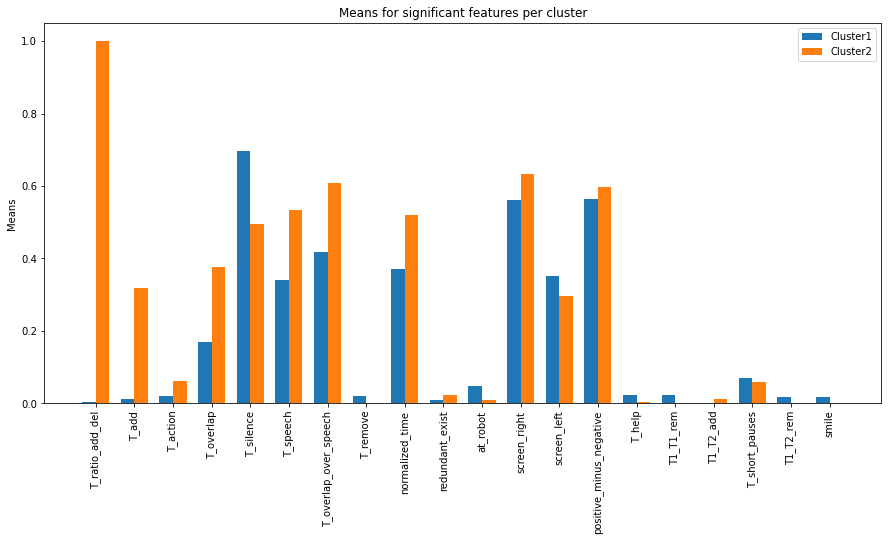

In [68]:
significant_feature12 =list(map(lambda c: c[0],list(filter(lambda pt: pt[1]<threshold,clus12))))
mean1=list()
mean2=list()
for ft in significant_feature12:
    mean1.append(mk[ft][1])
    mean2.append(mk[ft][2])
x = np.arange(len(significant_feature12))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(15,7))
rects1 = ax.bar(x - width/2, mean1, width, label='Cluster1')
rects2 = ax.bar(x + width/2, mean2, width, label='Cluster2')

ax.set_ylabel('Means')
ax.set_title('Means for significant features per cluster')
ax.set_xticks(x)
ax.set_xticklabels(significant_feature12)
plt.xticks(rotation=90)
ax.legend()


plt.show()

## HMM

In [69]:
from hmmlearn import hmm

In [70]:
## For each team the set of observations is a sequence
## So we have #teams sequences with #dp_per_team emissions
## label and team_n should be dropped and obseravtions should be sorted by time
by_team = clustered_features.drop('label',axis=1).groupby('team')
lengths= by_team.count()['normalized_time'].to_numpy()
observations = by_team.get_group(6).drop('team',axis=1).to_numpy()
for name,group in by_team:
    if(name!=6):
        observations = np.concatenate([observations,group.drop('team',axis=1).to_numpy()])

In [75]:
# build HMM model with 3 components and fit it to the observations sequences
model = hmm.GMMHMM(n_components=3,covariance_type='spherical')
model = model.fit(observations,lengths)

In [76]:
## Indicates whether the model has converged
print(model.monitor_.converged)
model.monitor_.report

True


<bound method ConvergenceMonitor.report of ConvergenceMonitor(
    history=[-175870.97311976273, 23926.45046481613, 23948.60386055428, 23955.066013746284, 23957.53093879412, 23958.73642305775, 23959.43535434131, 23959.884621511228, 23960.180072877698, 23960.371723036133],
    iter=10,
    n_iter=10,
    tol=0.01,
    verbose=False,
)>

In [77]:
## Initial state occupation distribution.
model.startprob_

array([6.75933244e-274, 1.00000000e+000, 6.78590752e-011])

In [78]:
## Matrix of transition probabilities between states.
model.transmat_

array([[0.38023706, 0.16371569, 0.45604726],
       [0.22597934, 0.52549392, 0.24852674],
       [0.2660036 , 0.12859934, 0.60539706]])

In [79]:
## Mixture weights for each state.
model.weights_

array([[1.],
       [1.],
       [1.]])

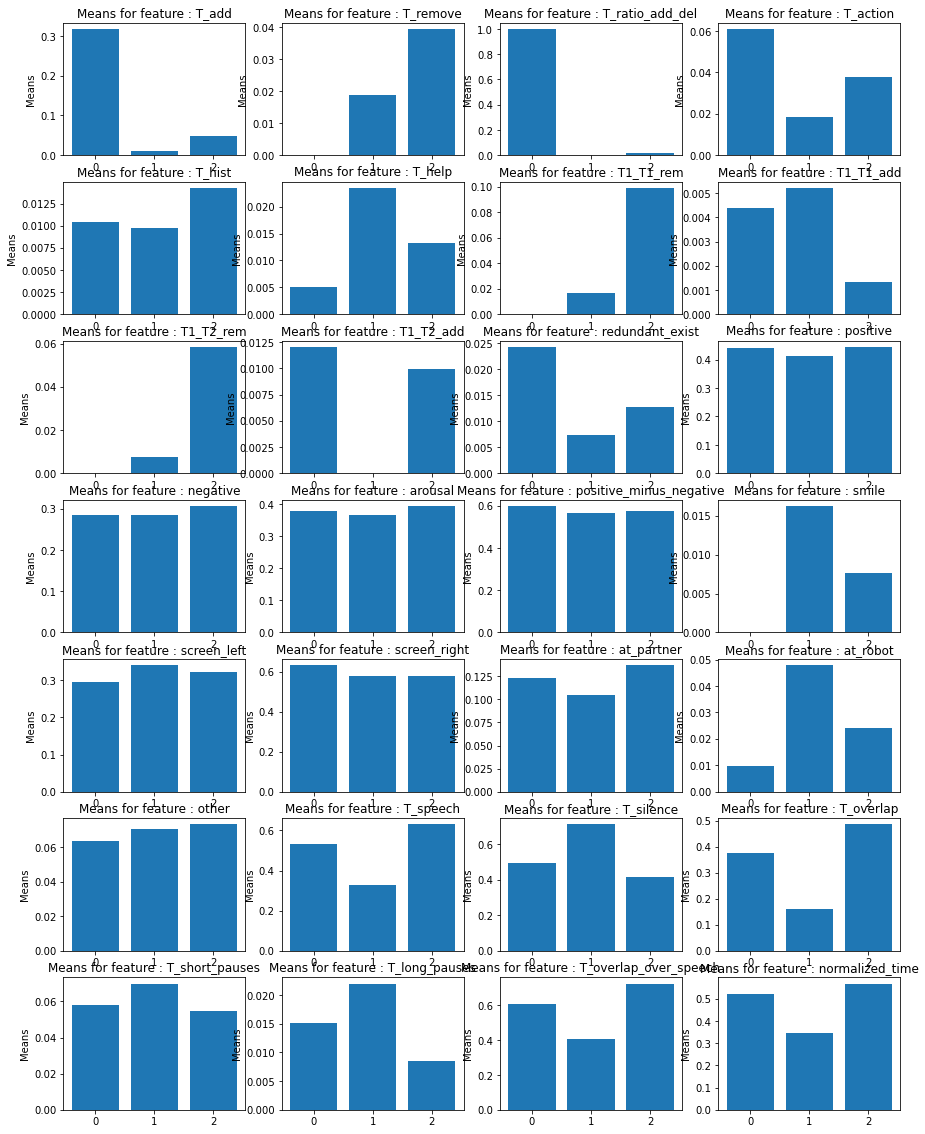

In [80]:
states= list(range(3))
## Mean parameters for each mixture component in each state.
fig, axs = plt.subplots(7, 4,figsize=(15,20))
for i in range(len(model.means_[0][0])):
    axs[i//4,i%4].bar(states,model.means_[:,0,i])
    axs[i//4,i%4].set_ylabel('Means')
    axs[i//4,i%4].set_title('Means for feature : '+columns[i])
plt.show()

In [81]:
## Covariance parameters for each mixture components in each state.
model.covars_

array([[0.01775572],
       [0.0162207 ],
       [0.02081972]])

In [82]:
## predict each dp state
states=[]
for name,group in by_team :
    obs= group.drop('team',axis=1).to_numpy()
    states =  np.concatenate([states,model.predict(obs,lengths=[obs.shape[0]])])
states_d= pd.DataFrame(std_features).assign(state=pd.Series(states).values)
states_dis = states_d.groupby('state')

In [83]:
state0 = states_dis.get_group(0)
state1 = states_dis.get_group(1)
state2 = states_dis.get_group(2)


In [84]:
## Kruskal Wallis Test
pvalues01 = []
pvalues02= []
pvalues12 = []
pvalues012=[]
for feature in columns:
    try:
        pvalues01.append(kruskal(state0[feature],state1[feature]).pvalue)
    except:
        pvalues01.append(None)
    try :
        pvalues02.append(kruskal(state0[feature],state2[feature]).pvalue)
    except :
        pvalues02.append(None)
    try:
        pvalues12.append(kruskal(state1[feature],state2[feature]).pvalue)
    except:
        pvalues12.append(None)
    try:
        pvalues012.append(kruskal(state0[feature],state1[feature],state2[feature]).pvalue)
    except:
        pvalues012.append(None)
tests_df = pd.DataFrame(index=columns).assign(pvalue_01=pd.Series(pvalues01).values).assign(pvalue_02=pd.Series(pvalues02).values)
tests_df = tests_df.assign(pvalue_12=pd.Series(pvalues12).values).assign(pvalue_012=pd.Series(pvalues012).values)
tests_df = tests_df.assign(mean_0=pd.Series(model.means_[0][0]).values).assign(mean_1=pd.Series(model.means_[1][0]).values)
tests_df = tests_df.assign(mean_2=pd.Series(model.means_[2][0]).values)
tests_df=tests_df.sort_values('pvalue_012')
tests_df

,pvalue_01,pvalue_02,pvalue_12,pvalue_012,mean_0,mean_1,mean_2
T_ratio_add_del,2.522343e-180,3.858427e-238,6.887920e-08,6.017450e-299,9.999776e-01,0.003821,0.018000
T_add,7.831090e-154,1.764562e-171,6.200071e-08,3.291514e-238,3.176994e-01,0.009552,0.047485
T_overlap,1.161025e-51,8.058392e-18,5.963706e-141,8.013849e-138,3.757699e-01,0.161496,0.485086
T_speech,1.336348e-50,2.334773e-15,4.094443e-131,2.039449e-128,5.326502e-01,0.328734,0.630318
T_silence,8.485716e-54,1.682291e-11,2.342093e-117,2.220391e-117,4.941683e-01,0.710892,0.413119
T_overlap_over_speech,2.054766e-39,2.871423e-16,6.663426e-111,6.409552e-109,6.088221e-01,0.405073,0.724056
T_action,1.094563e-76,2.932211e-45,5.428651e-07,3.878318e-76,6.096387e-02,0.018654,0.037860
T_remove,3.289949e-16,4.087804e-36,4.365908e-08,3.325743e-37,4.004172e-06,0.018778,0.039494
normalized_time,2.384327e-19,2.964174e-03,1.154598e-32,2.948921e-33,5.192541e-01,0.347154,0.568438
T1_T1_rem,6.479233e-03,4.728745e-12,4.537612e-07,9.148686e-16,2.732521e-11,0.016728,0.098858


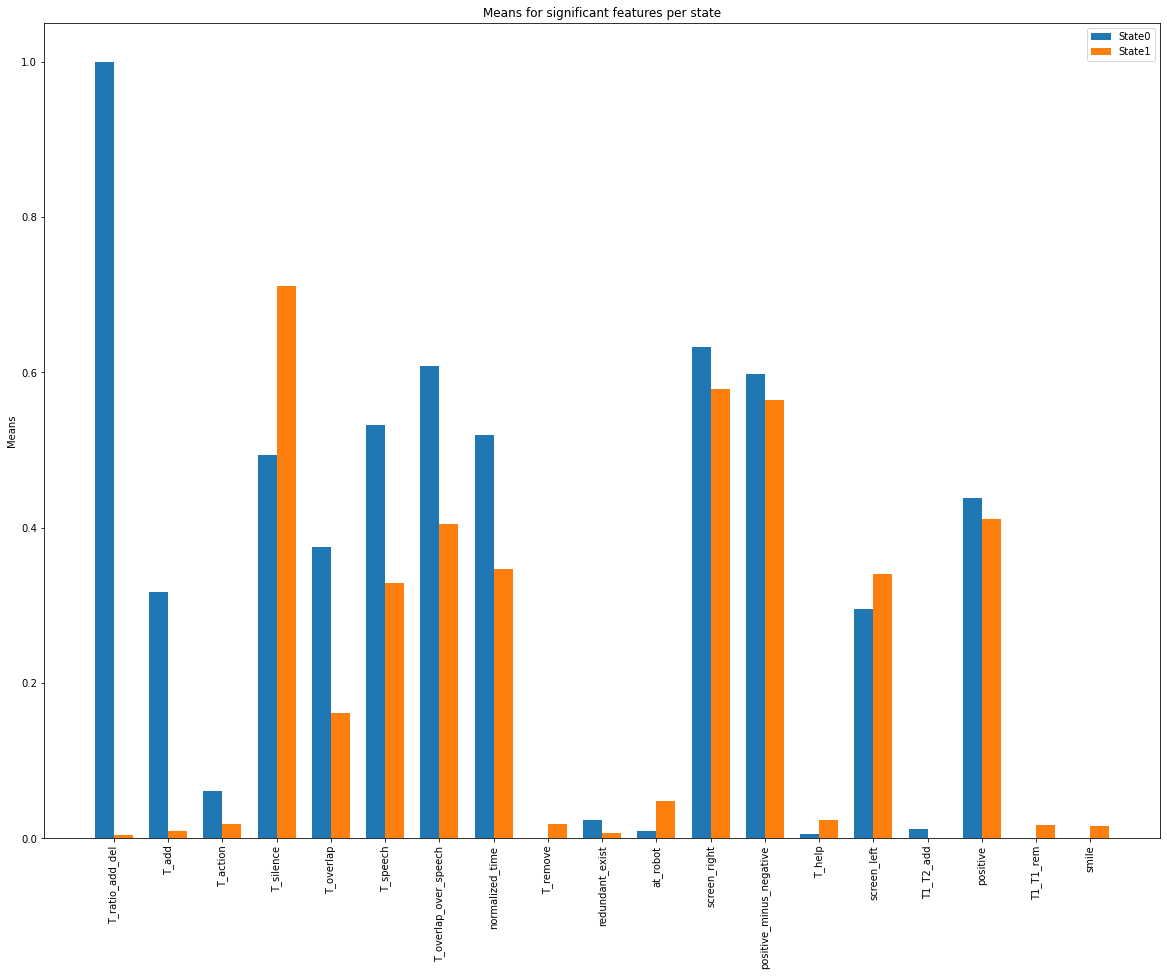

In [85]:
filtered= tests_df[tests_df['pvalue_01']<0.01]
filtered=filtered.sort_values('pvalue_01')
significant = filtered.index.to_list()
mean0=filtered['mean_0'].to_list()
mean1=filtered['mean_1'].to_list()
x = np.arange(len(significant))
width = 0.35 
fig, ax = plt.subplots(figsize=(20,15))
rects1 = ax.bar(x - width/2, mean0, width, label='State0')
rects1 = ax.bar(x + width/2, mean1, width, label='State1')
ax.set_ylabel('Means')
ax.set_title('Means for significant features per state')
ax.set_xticks(x)
ax.set_xticklabels(significant)
plt.xticks(rotation=90)
ax.legend()


plt.show()

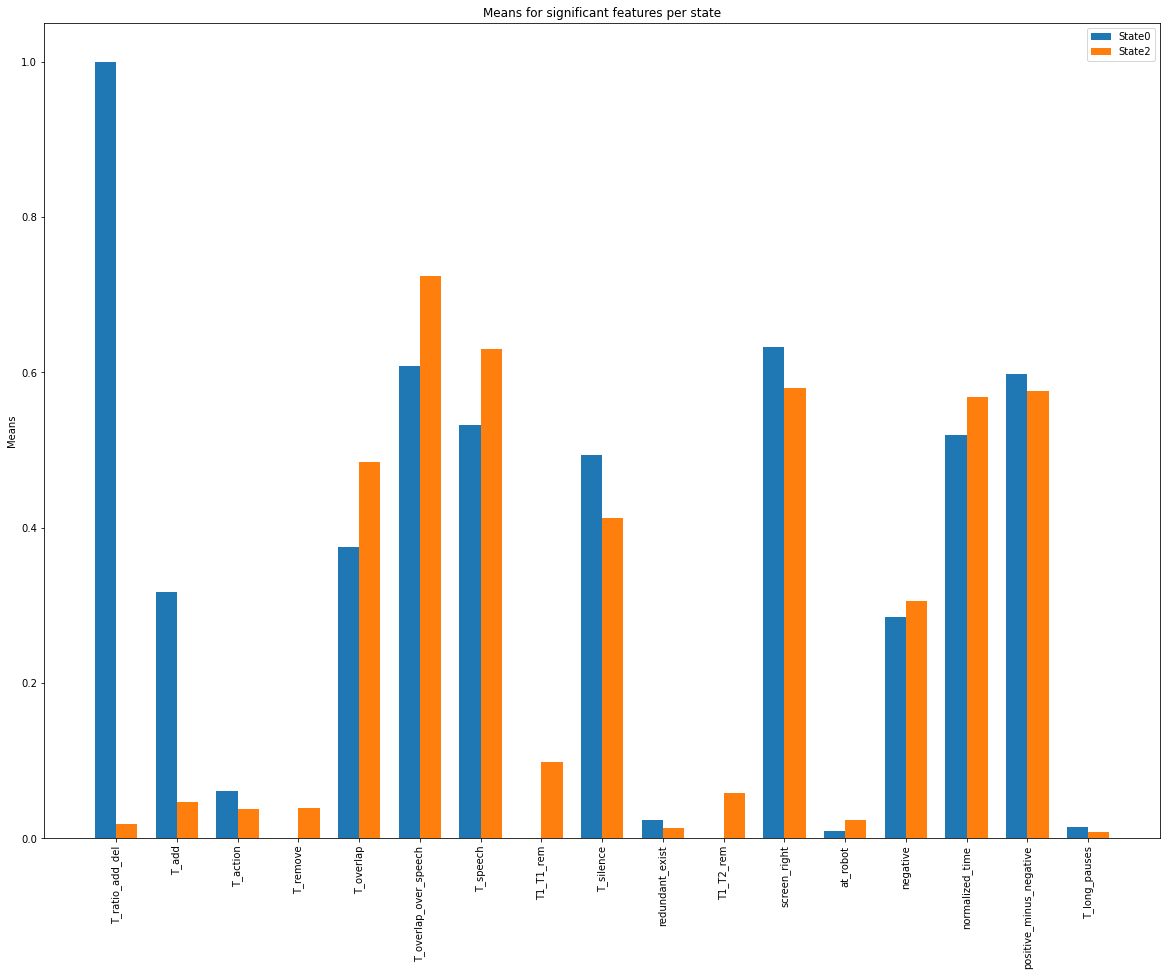

In [86]:
filtered= tests_df[tests_df['pvalue_02']<0.01]
filtered=filtered.sort_values('pvalue_02')
significant = filtered.index.to_list()
mean0=filtered['mean_0'].to_list()
mean2=filtered['mean_2'].to_list()
x = np.arange(len(significant))
width = 0.35
fig, ax = plt.subplots(figsize=(20,15))
rects0 = ax.bar(x - width/2, mean0, width, label='State0')
rects2 = ax.bar(x + width/2, mean2, width, label='State2')
ax.set_ylabel('Means')
ax.set_title('Means for significant features per state')
ax.set_xticks(x)
ax.set_xticklabels(significant)
plt.xticks(rotation=90)
ax.legend()


plt.show()

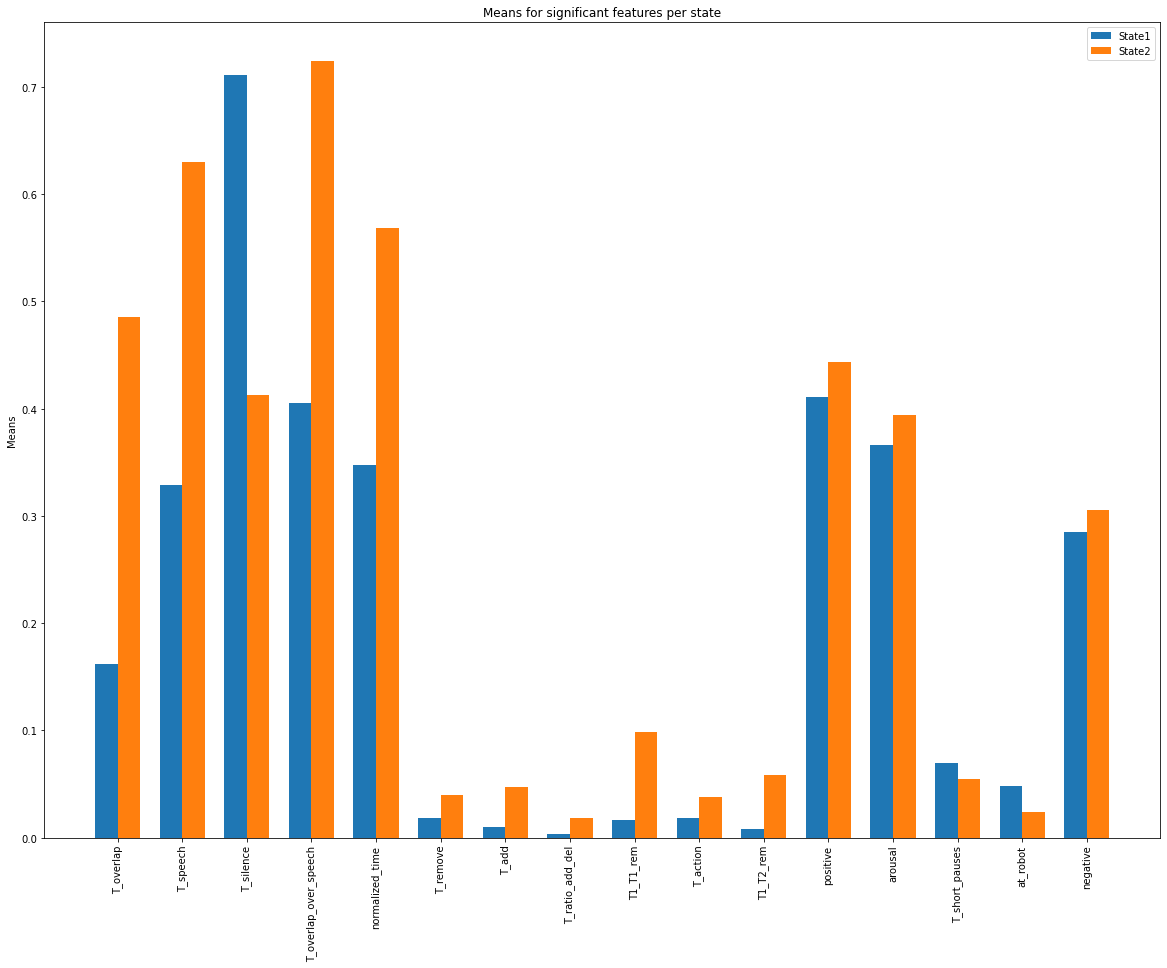

In [87]:
filtered= tests_df[tests_df['pvalue_12']<0.01]
filtered=filtered.sort_values('pvalue_12')
significant = filtered.index.to_list()
mean1=filtered['mean_1'].to_list()
mean2=filtered['mean_2'].to_list()
x = np.arange(len(significant))
width = 0.35 
fig, ax = plt.subplots(figsize=(20,15))
rects1 = ax.bar(x - width/2, mean1, width, label='State1')
rects2 = ax.bar(x + width/2, mean2, width, label='State2')
ax.set_ylabel('Means')
ax.set_title('Means for significant features per state')
ax.set_xticks(x)
ax.set_xticklabels(significant)
plt.xticks(rotation=90)
ax.legend()


plt.show()

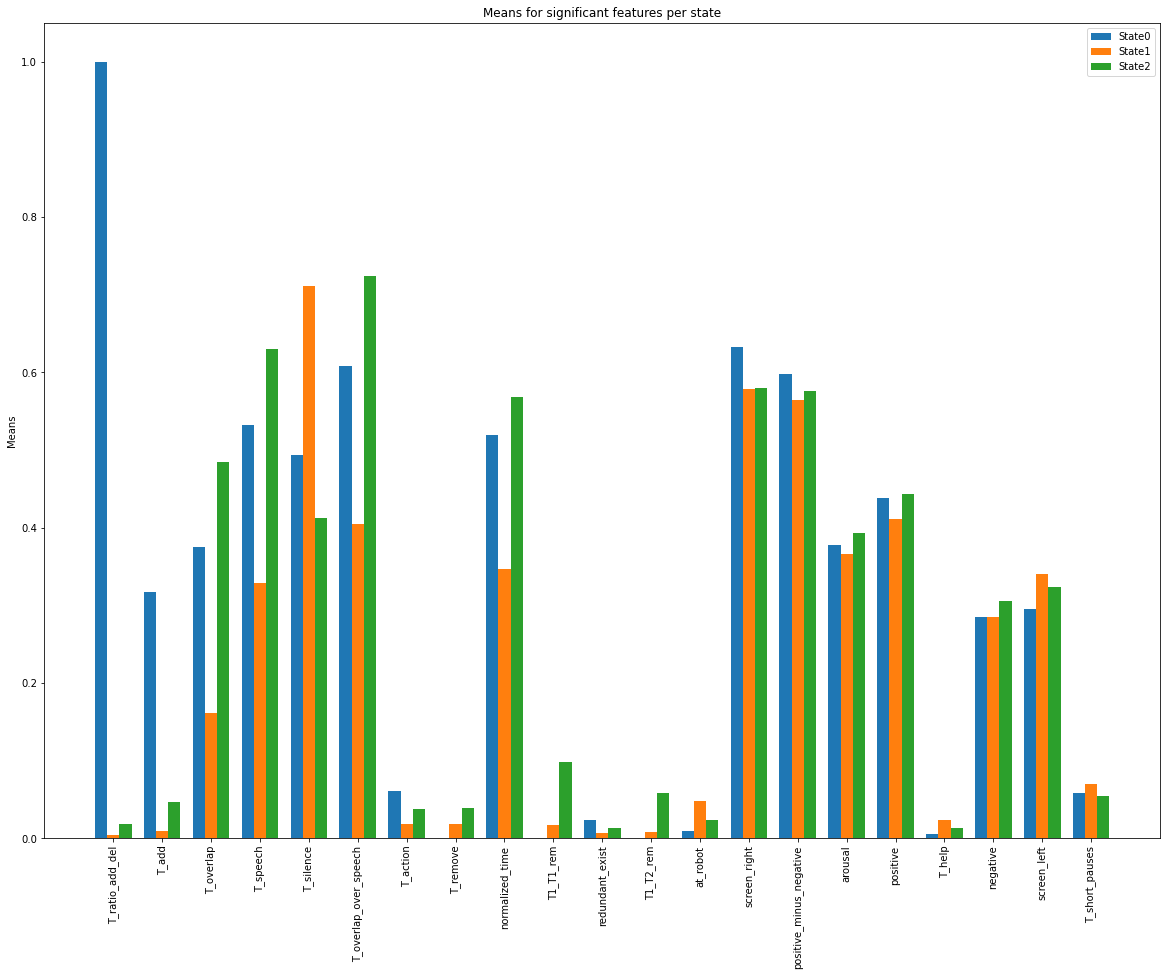

In [88]:
filtered= tests_df[tests_df['pvalue_012']<0.01]
significant = filtered.index.to_list()
mean0=filtered['mean_0'].to_list()
mean1=filtered['mean_1'].to_list()
mean2=filtered['mean_2'].to_list()

x = np.arange(len(significant))
x=x+0.5
width = 0.25 

fig, ax = plt.subplots(figsize=(20,15))
rects1 = ax.bar(x - width, mean0, width, label='State0')
rects1 = ax.bar(x , mean1, width, label='State1')
rects2 = ax.bar(x + width, mean2, width, label='State2')

ax.set_ylabel('Means')
ax.set_title('Means for significant features per state')
ax.set_xticks(x)
ax.set_xticklabels(significant)
plt.xticks(rotation=90)
ax.legend()


plt.show()


In [90]:
import graphviz as gr

In [91]:
log=columns[:11]
video=columns[11:21]
audio=columns[21:-1]
sort_by=filtered.index.map(lambda x: 0 if(x in log) else (1 if(x in video) else (2 if(x in audio) else 3)))
graph = filtered.assign(sort_by=sort_by)
graph=graph.sort_values('sort_by',axis=0)
description = ['''Highest''','''High''','''Medium''','''Low''','''Lowest''']
mean0=graph['mean_0'].to_list()
mean1=graph['mean_1'].to_list()
mean2=graph['mean_2'].to_list()
means=[mean0,mean1,mean2]
significant=graph.index.to_list()
colors= ['''''','''''','''''']

In [92]:
#Generate state description
# Highest Value for each feature is marked with highest, same for lowest
# the remaining value is High, Medium, Low based on its distance from the min and the max
states_des=[["","",""],["","",""],["","",""],["","",""]]
new_des=["","",""]
i=0
for ft in significant:
    max_value= max(means[0][i],means[1][i],means[2][i])
    min_value=min(means[0][i],means[1][i],means[2][i])
    for j in range(3):
        if(means[j][i]==max_value):
            new_des[j]= "{:<30}".format(ft) +'\t'+ description[0] +"<br/>"
        elif(((means[j][i]-min_value)/(max_value-min_value))>2/3):
            new_des[j]= "{:<30}".format(ft) +'\t'+ description[1] +"<br/>"
        elif (((means[j][i]-min_value)/(max_value-min_value))>1/3):
            new_des[j]= "{:<30}".format(ft) +'\t'+ description[2] +"<br/>"
        elif(means[j][i]==min_value):
            new_des[j]= "{:<30}".format(ft) +'\t'+ description[4] +"<br/>"
        else:
            new_des[j]= "{:<30}".format(ft)+'\t'+ description[3] +"<br/>"
    if not(new_des[0]==new_des[1] and new_des[0]==new_des[2] and new_des[2]==new_des[1]):
        for j in range(3):
            states_des[graph.loc[ft,'sort_by']][j]+=new_des[j]
    i+=1

In [93]:
G= gr.Digraph('Type2HMMStateDiagram',format='jpeg')
G.attr('graph',pad='1',ranksep='1',nodesep='1')

prob="{proba:.2e}"

widths= [1.5,1.5,1.5]
widths[np.argmin(model.startprob_)] = 0.5
widths[np.argmax(model.startprob_)]=9

G.attr('node',color='red')
G.attr('node',color='red')
G.node('0.0','''<<font color="blue">''' + states_des[0][0]+'''</font>'''\
       +'''<font color="#1d8348">'''+ states_des[1][0]+'''</font>'''\
       +'''<font color="orange">'''+ states_des[2][0]+'''</font>'''\
       '''<font color="black">'''+ states_des[3][0]+'''</font>>''',shape='box')

G.node('1.0','''<<font color="blue">''' + states_des[0][1]+'''</font>'''\
       +'''<font color="#1d8348">'''+ states_des[1][1]+'''</font>'''\
       +'''<font color="orange">'''+ states_des[2][1]+'''</font>'''\
       '''<font color="black">'''+ states_des[3][1]+'''</font>>''',shape='box')

G.node('2.0','''<<font color="blue">''' + states_des[0][2]+'''</font>'''\
       +'''<font color="#1d8348">'''+ states_des[1][2]+'''</font>'''\
       +'''<font color="orange">'''+ states_des[2][2]+'''</font>'''\
       '''<font color="black">'''+ states_des[3][2]+'''</font>>''',shape='box')

G.attr('node',penwidth=str(widths[0]))
G.node('0','State 0\n\nInitial state probability: '+prob.format(proba=model.startprob_[0]))
G.attr('node',penwidth=str(widths[1]))
G.node('1','State 1\n\nInitial state probability: '+prob.format(proba=model.startprob_[1]))
G.attr('node',penwidth=str(widths[2]))
G.node('2','State 2\n\nInitial state probability: '+prob.format(proba=model.startprob_[2]))


prob="{proba:.3f}"
G.attr('edge',penwidth=str(10*model.transmat_[0][0]))
G.edge('0','0',prob.format(proba=model.transmat_[0][0]))
G.attr('edge',penwidth=str(10*model.transmat_[0][1]))
G.edge('0','1',prob.format(proba=model.transmat_[0][1]))
G.attr('edge',penwidth=str(10*model.transmat_[0][2]))
G.edge('0','2',prob.format(proba=model.transmat_[0][2]))

G.attr('edge',penwidth=str(10*model.transmat_[1][0]))
G.edge('1','0',prob.format(proba=model.transmat_[1][0]))
G.attr('edge',penwidth=str(10*model.transmat_[1][1]))
G.edge('1','1',prob.format(proba=model.transmat_[1][1]))
G.attr('edge',penwidth=str(10*model.transmat_[1][2]))
G.edge('1','2',prob.format(proba=model.transmat_[1][2]))

G.attr('edge',penwidth=str(10*model.transmat_[2][0]))
G.edge('2','0',prob.format(proba=model.transmat_[2][0]))
G.attr('edge',penwidth=str(10*model.transmat_[2][1]))
G.edge('2','1',prob.format(proba=model.transmat_[2][1]))
G.attr('edge',penwidth=str(10*model.transmat_[2][2]))
G.edge('2','2',prob.format(proba=model.transmat_[2][2]))

G.attr('edge',penwidth=str(1))
G.attr('edge',fontcolor='red')
G.attr('edge',dir='none')
G.attr('edge',color='red')
G.edge('0','0.0','Key Features')
G.edge('1','1.0','Key Features')
G.edge('2','2.0','Key Features')
G.graph_attr.update(size="15,12")

G.view()


'Type2HMMStateDiagram.gv.jpeg'